# Calorie Prediction: Data Analysis and Modeling
This notebook covers the steps of data analysis, feature engineering, and machine learning modeling for the calorie estimation competition.  
Purpose: To estimate calories burned during an exercise.

In [2]:
# Install missing packages if needed
%pip install pandas numpy matplotlib seaborn

# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Graphics settings
sns.set(style="whitegrid")
plt.style.use("ggplot")

Note: you may need to restart the kernel to use updated packages.


## 1. Loading Data and Initial Review (Data Exploration)

In [3]:
# Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# Examine the first 5 lines
print("🔹 Train Set")
display(train_df.head())

print("\n🔹 Test Set")
display(test_df.head())

print("\n🔹 Sample Submission")
display(sample_submission.head())

# General information and data type control
print("\n📋 Train Info:")
train_df.info()

# Missing value check
print("\n🧼 Eksik Değerler (Train):")
print(train_df.isnull().sum())

print("\n🧼 Eksik Değerler (Test):")
print(test_df.isnull().sum())

🔹 Train Set


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0



🔹 Test Set


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5



🔹 Sample Submission


,id,Calories
0,750000,88.283
1,750001,88.283
2,750002,88.283
3,750003,88.283
4,750004,88.283



📋 Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB

🧼 Eksik Değerler (Train):
id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

🧼 Eksik Değerler (Test):
id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

## 2. Data Cleaning

In [4]:
# Convert sex column to numeric
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# Distinction between ID and target variables
X = train_df.drop(['id', 'Calories'], axis=1)
y = train_df['Calories']
test_features = test_df.drop(['id'], axis=1)

# Min-max control
print("📉 Değer Aralıkları:")
display(train_df.describe().T[['min', 'max']])


📉 Değer Aralıkları:


,min,max
id,0.0,749999.0
Sex,0.0,1.0
Age,20.0,79.0
Height,126.0,222.0
Weight,36.0,132.0
Duration,1.0,30.0
Heart_Rate,67.0,128.0
Body_Temp,37.1,41.5
Calories,1.0,314.0


## 3. Exploratory Data Analysis - EDA

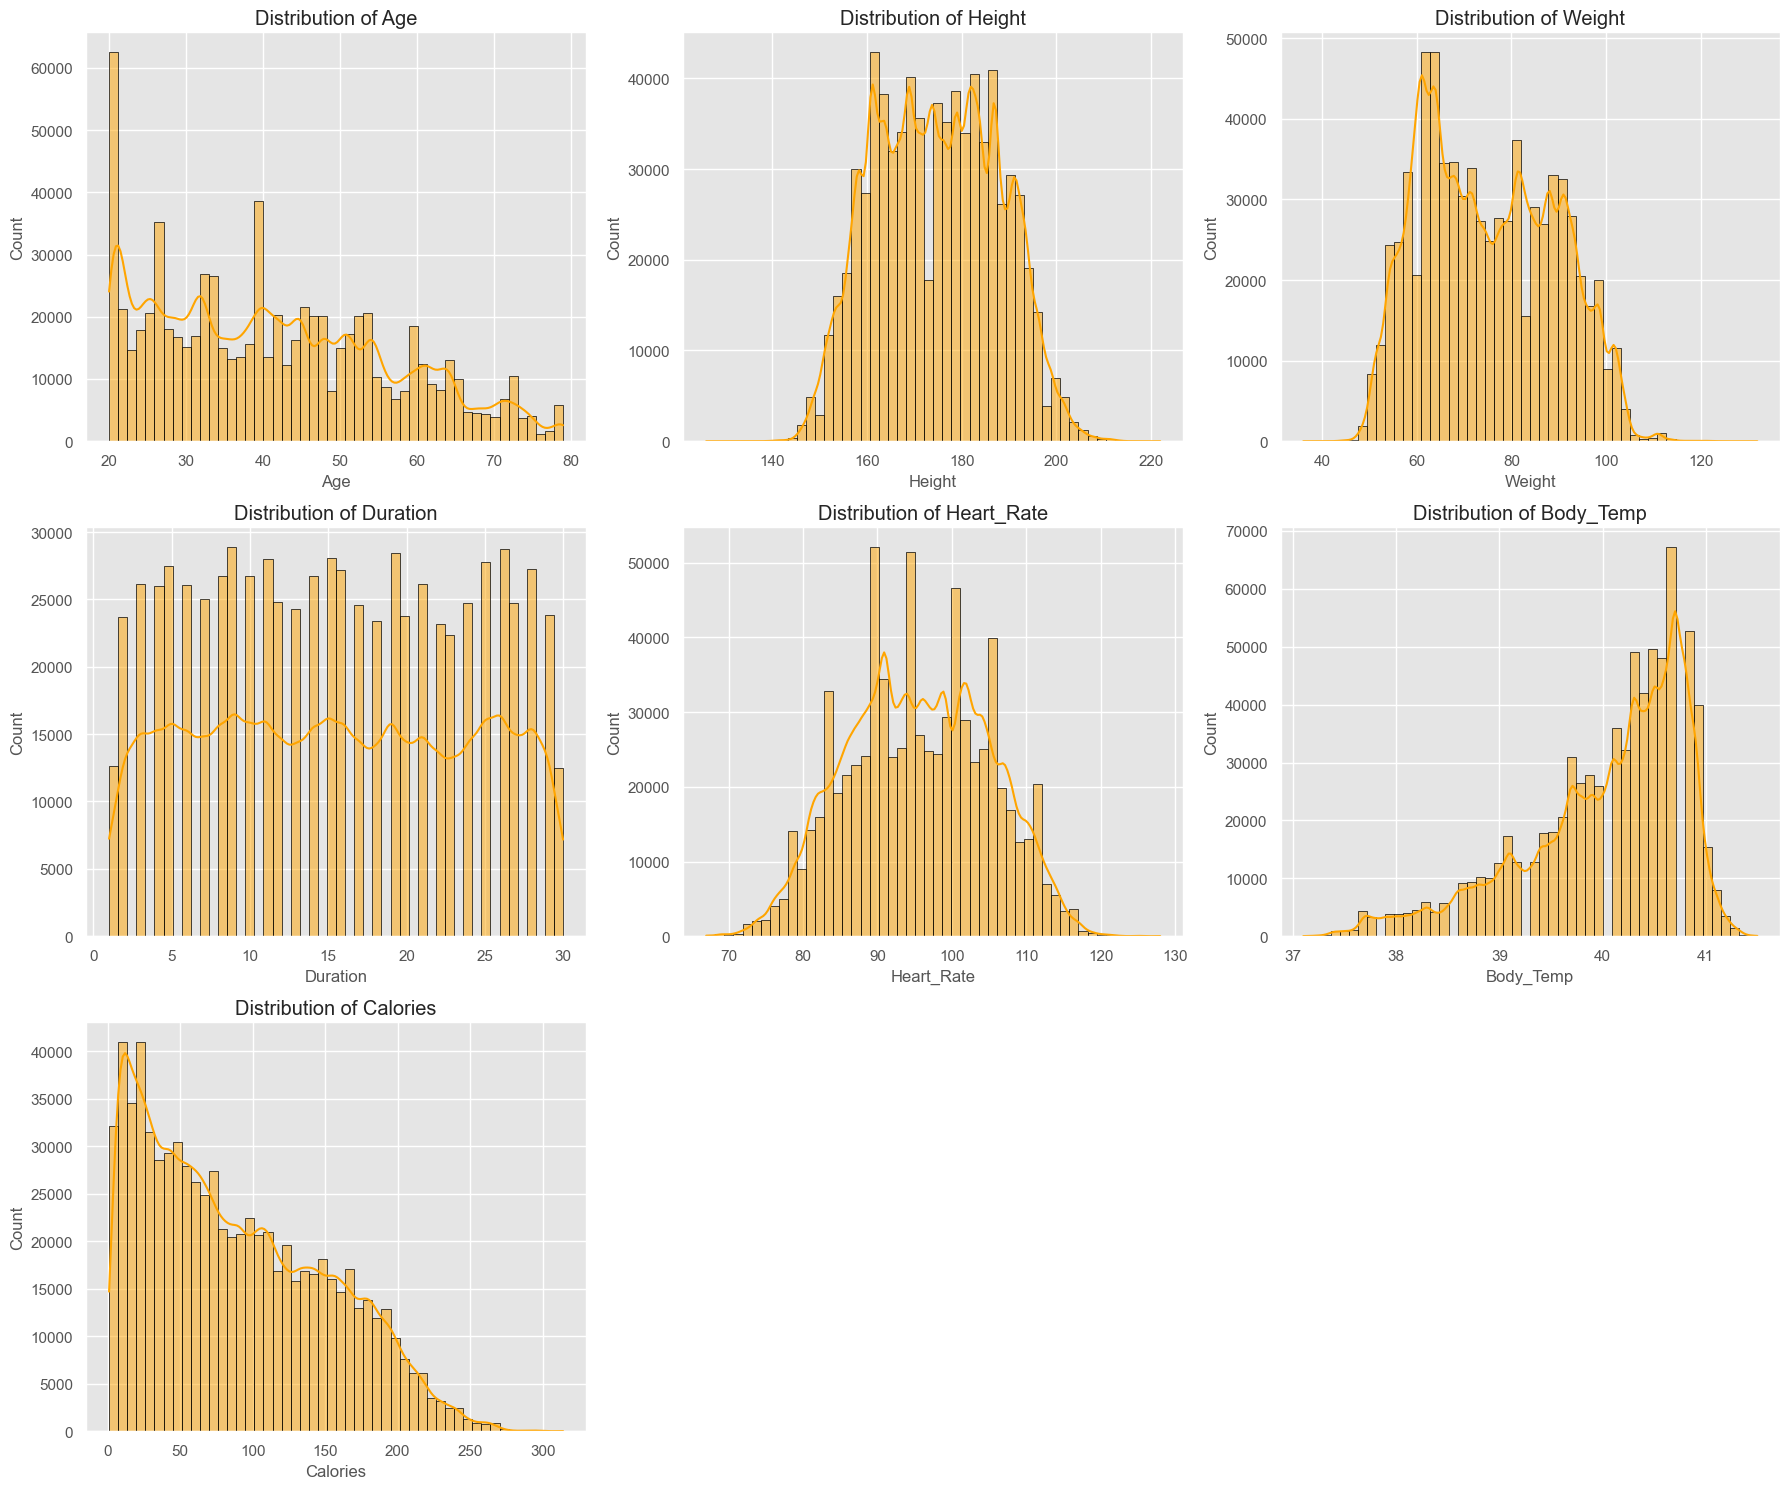

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric features (excluding 'id' and 'Calories' for now)
numeric_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

# Create subplots
plt.figure(figsize=(18, 15))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(train_df[feature], kde=True, bins=50, color='orange', edgecolor='black')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


C:\Users\muham\AppData\Local\Temp\ipykernel_7020\2086519265.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Calories', data=train_df, errorbar='sd', palette='Set2')


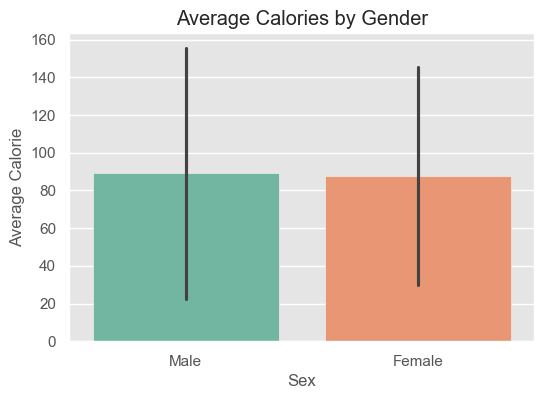

In [6]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Calories', data=train_df, errorbar='sd', palette='Set2')
plt.title("Average Calories by Gender")
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel("Average Calorie")
plt.show()

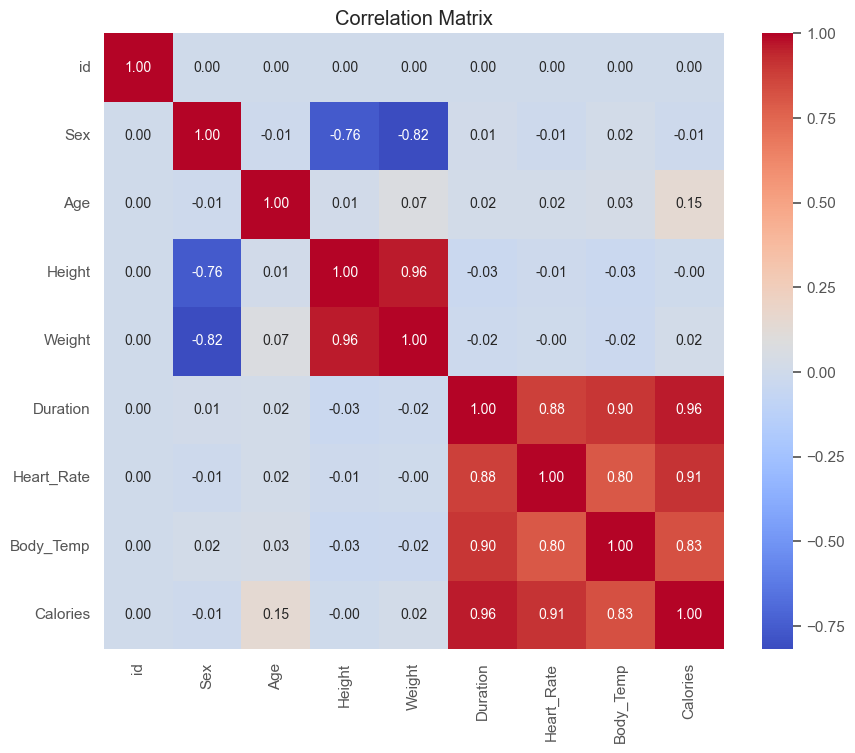

In [7]:
plt.figure(figsize=(10, 8))
corr = train_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

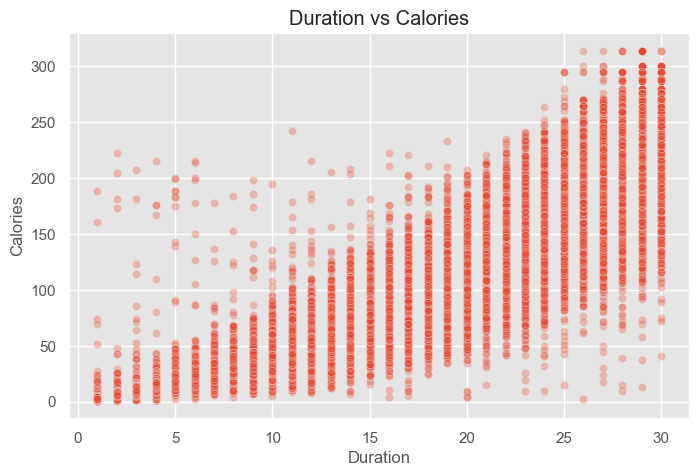

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Duration', y='Calories', data=train_df, alpha=0.3)
plt.title("Duration vs Calories")
plt.xlabel("Duration")
plt.ylabel("Calories")
plt.show()

## 4. Feature Engineering

In [9]:
# ░▒▓ BMI: Body Mass Index ▓▒░
train_df['BMI'] = train_df['Weight'] / (train_df['Height']/100)**2
test_df['BMI'] = test_df['Weight'] / (test_df['Height']/100)**2

# ░▒▓ Age Group ▓▒░
def age_group(age):
    if age < 30:
        return 'young'
    elif age < 60:
        return 'adult'
    else:
        return 'senior'

train_df['Age_Group'] = train_df['Age'].apply(age_group)
test_df['Age_Group'] = test_df['Age'].apply(age_group)

# ░▒▓ Heart Rate Zone ▓▒░
def heart_rate_zone(hr):
    if hr < 90:
        return 'light'
    elif hr < 110:
        return 'moderate'
    else:
        return 'intense'

train_df['HR_Zone'] = train_df['Heart_Rate'].apply(heart_rate_zone)
test_df['HR_Zone'] = test_df['Heart_Rate'].apply(heart_rate_zone)

# ░▒▓ Body Temperature Deviation ▓▒░
train_df['Temp_Deviation'] = train_df['Body_Temp'] - 37.0
test_df['Temp_Deviation'] = test_df['Body_Temp'] - 37.0

# ░▒▓ Check ▓▒░
print("✅ New Features Added. Updated Train Columns:")
print(train_df.columns)


✅ New Features Added. Updated Train Columns:
Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories', 'BMI', 'Age_Group', 'HR_Zone',
       'Temp_Deviation'],
      dtype='object')


## 5. Data Preprocessing

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# ░▒▓ Kategorik ve Sayısal Özellikleri Ayır ▓▒░
categorical_features = ['Sex', 'Age_Group', 'HR_Zone']
numerical_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'BMI', 'Temp_Deviation']

# ░▒▓ OneHotEncoder Kategorik Özellikler İçin ▓▒░
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# ░▒▓ Sayısal Özellikleri StandardScaler ile Normalize Et ▓▒░
numerical_transformer = StandardScaler()

# ░▒▓ ColumnTransformer ile Birleştir ▓▒░
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# ░▒▓ Preprocessing Pipeline Hazır ▓▒░
print("✅ Preprocessing pipeline oluşturuldu.")

✅ Preprocessing pipeline oluşturuldu.


## 6. Model Selection

In [11]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
import numpy as np

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(n_estimators=50, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=50, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"⏳ Evaluating: {name}")
    pipeline = make_pipeline(preprocessor, model)
    scores = cross_val_score(pipeline, train_df.drop(columns='Calories'), train_df['Calories'], 
                             cv=5, scoring='neg_mean_absolute_error')
    results[name] = -np.mean(scores)  # MAE'nin pozitif hali
    print(f"✅ {name} done.")

# ░▒▓ Sonuçları Gör ▓▒░
for name, score in sorted(results.items(), key=lambda x: x[1]):
    print(f"{name}: MAE = {score:.2f}")

⏳ Evaluating: LinearRegression
✅ LinearRegression done.
⏳ Evaluating: Ridge
✅ Ridge done.
⏳ Evaluating: Lasso
✅ Lasso done.
⏳ Evaluating: RandomForest
✅ RandomForest done.
⏳ Evaluating: GradientBoosting
✅ GradientBoosting done.
RandomForest: MAE = 2.31
GradientBoosting: MAE = 3.77
Ridge: MAE = 6.90
LinearRegression: MAE = 6.90
Lasso: MAE = 7.86


## 7. Model Training

In [23]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# ░▒▓ Train-validation ayır ▓▒░
X = train_df.drop(columns='Calories')
y = train_df['Calories']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ░▒▓ Hiperparametre arama ▓▒░
param_grid = {
    'randomforestregressor__n_estimators': [100, 200, 300],
    'randomforestregressor__max_depth': [10, 20, None],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4],
    'randomforestregressor__max_features': ['sqrt', 'log2']
}

search = RandomizedSearchCV(
    estimator=make_pipeline(preprocessor, RandomForestRegressor(random_state=42)),
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)

search.fit(X_train, y_train)

print("✅ En iyi skor:", -search.best_score_)
print("🏆 En iyi parametreler:", search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\muham\OneDrive\Belgeler\Github_Projeler\Kaggle_Competition\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\muham\OneDrive\Belgeler\Github_Projeler\Kaggle_Competition\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\muham\OneDrive\Belgeler\Github_Projeler\Kaggle_Competition\.venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(es

✅ En iyi skor: 2.4102779287741543
🏆 En iyi parametreler: {'randomforestregressor__n_estimators': 200, 'randomforestregressor__min_samples_split': 5, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__max_features': 'log2', 'randomforestregressor__max_depth': None}


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

# ░▒▓ En iyi modeli tanımla ▓▒░
best_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    random_state=42
    )

# ░▒▓ Pipeline ile birleştir ▓▒░
final_pipeline = make_pipeline(preprocessor, best_model)

# ░▒▓ Eğitim (Training) ▓▒░
final_pipeline.fit(train_df.drop(columns='Calories'), train_df['Calories'])
print("✅ Model başarıyla eğitildi.")

# ░▒▓ Tahmin (Prediction) ▓▒░
predictions = final_pipeline.predict(test_df)

# ░▒▓ Sonuçları sample_submission formatına aktar ▓▒░
import pandas as pd

submission = pd.read_csv("sample_submission.csv")
submission['Calories'] = predictions

# ░▒▓ CSV olarak kaydet ▓▒░
submission.to_csv("submission.csv", index=False)
print("📁 'submission.csv' dosyası başarıyla oluşturuldu.")

✅ Model başarıyla eğitildi.
📁 'submission.csv' dosyası başarıyla oluşturuldu.


## 8. Model Evaluation

#### 8.1 Eğitim ve Validation Verisini Ayır

In [13]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns='Calories')
y = train_df['Calories']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### 8.2 Modeli Eğit ve Tahmin Yap

In [14]:
# Aynı pipeline ile yeniden eğitiyoruz
eval_pipeline = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=50, random_state=42))
eval_pipeline.fit(X_train, y_train)

# Tahmin
y_pred = eval_pipeline.predict(X_val)

#### 8.3 Hata Metriklerini Hesapla

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

MAE:  2.31
RMSE: 3.83
R²:   0.9962


#### 8.4 Gerçek vs Tahmin Grafiği

C:\Users\muham\AppData\Local\Temp\ipykernel_7020\3532367312.py:10: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\muham\OneDrive\Belgeler\Github_Projeler\Kaggle_Competition\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


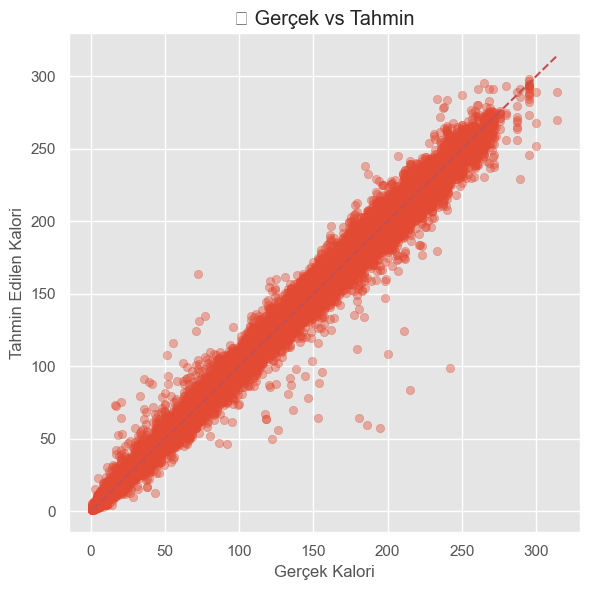

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_val, y_pred, alpha=0.4)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], '--r')
plt.xlabel('Gerçek Kalori')
plt.ylabel('Tahmin Edilen Kalori')
plt.title('🎯 Gerçek vs Tahmin')
plt.grid(True)
plt.tight_layout()
plt.show()

## 9. Feature Importance (Özellik Önem Dereceleri)

C:\Users\muham\AppData\Local\Temp\ipykernel_7020\2861678757.py:33: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\muham\OneDrive\Belgeler\Github_Projeler\Kaggle_Competition\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


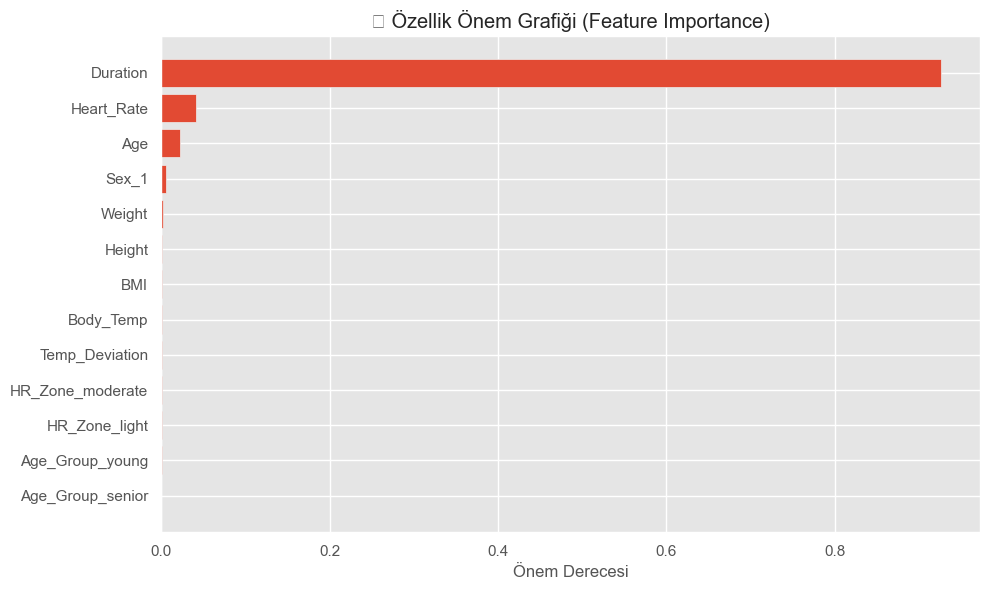

In [17]:
# ░▒▓ Pipeline içindeki modele eriş ▓▒░
model = eval_pipeline.named_steps['randomforestregressor']

# ░▒▓ Preprocessing sonrası gelen tüm feature isimlerini al ▓▒░
# Sayısal + OneHot kategorik adlar
from sklearn.compose import make_column_selector as selector

# Encoder’dan çıkan kolon isimlerini al
ohe = eval_pipeline.named_steps['columntransformer'].named_transformers_['cat']
encoded_cat_features = ohe.get_feature_names_out(['Sex', 'Age_Group', 'HR_Zone'])

# Tüm özellik isimlerini sırayla birleştir
feature_names = numerical_features + list(encoded_cat_features)

# ░▒▓ Feature importance değerlerini al ▓▒░
importances = model.feature_importances_

# ░▒▓ Görselleştir ▓▒░
import matplotlib.pyplot as plt
import pandas as pd

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Önem Derecesi')
plt.title('🔍 Özellik Önem Grafiği (Feature Importance)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()